In [ ]:
#Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

In [3]:
import numpy as np 
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("netflix.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Starting with pre-processing/cleaning of the dataset. Pre-processing will involve:
# 1. Dealing with NaN values in the dataset.(whether to drop them or impute them)
# 2. Unnesting of the data in some columns like director,cast,etc.


In [5]:
# Checking the number of NaN values in different columns.

df.isna().sum()   

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
#Checking the number of Nan values in different rows.

df.isna().sum(axis=1)    


0       1
1       1
2       1
3       3
4       1
       ..
8802    0
8803    3
8804    0
8805    0
8806    0
Length: 8807, dtype: int64

In [7]:
# Dropping rows where NaN values are greater than or equal to 3. Its less than 2% of entire data so dropping them.

ind = df[df.isna().sum(axis=1)>=3].index
df.drop(index = ind,inplace=True)   

In [9]:
#Filling country column's NaNs with its mode value.

df["country"].fillna(value = df["country"].mode()[0],inplace =True)

In [11]:
#Dropping the "description" column beacuse it wont help in the analysis. 

df.drop(columns=["description"],inplace=True)

In [12]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas"
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",United States,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."


# 1. Splitting various nested/clubbed columns and exploding it into different rows.

In [13]:
df_split1 = df.loc[:,["show_id","listed_in"]]
df_split1

,show_id,listed_in
0,s1,Documentaries
1,s2,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,"Crime TV Shows, International TV Shows, TV Act..."
4,s5,"International TV Shows, Romantic TV Shows, TV ..."
5,s6,"TV Dramas, TV Horror, TV Mysteries"
...,...,...
8801,s8802,"Dramas, International Movies, Thrillers"
8802,s8803,"Cult Movies, Dramas, Thrillers"
8804,s8805,"Comedies, Horror Movies"
8805,s8806,"Children & Family Movies, Comedies"


In [14]:
df_split1["listed_in"] = df_split1["listed_in"].str.split(",",expand=False)

In [15]:
df_genre = df_split1.explode("listed_in")

In [16]:
df_genre                                  #"listed_in" column after unnestinig and exploding into various rows.

,show_id,listed_in
0,s1,Documentaries
1,s2,International TV Shows
1,s2,TV Dramas
1,s2,TV Mysteries
2,s3,Crime TV Shows
...,...,...
8805,s8806,Children & Family Movies
8805,s8806,Comedies
8806,s8807,Dramas
8806,s8807,International Movies


In [17]:
df_split2 = df.loc[:,["show_id","cast"]]
df_split2

,show_id,cast
0,s1,NaN
1,s2,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,s3,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
4,s5,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."
5,s6,"Kate Siegel, Zach Gilford, Hamish Linklater, H..."
...,...,...
8801,s8802,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ..."
8802,s8803,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J..."
8804,s8805,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ..."
8805,s8806,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma..."


In [18]:
df_split2["cast"] = df_split2["cast"].str.split(",",expand=False)

In [19]:
df_cast = df_split2.explode("cast")

In [113]:
df_cast.head(10)                           #"cast" column after unnestinig and exploding into various rows.


,show_id,cast
0,s1,NaN
1,s2,Ama Qamata
1,s2,Khosi Ngema
1,s2,Gail Mabalane
1,s2,Thabang Molaba
1,s2,Dillon Windvogel
1,s2,Natasha Thahane
1,s2,Arno Greeff
1,s2,Xolile Tshabalala
1,s2,Getmore Sithole


In [21]:
df_split3 = df.loc[:,["show_id","director"]]
df_split3

,show_id,director
0,s1,Kirsten Johnson
1,s2,NaN
2,s3,Julien Leclercq
4,s5,NaN
5,s6,Mike Flanagan
...,...,...
8801,s8802,Majid Al Ansari
8802,s8803,David Fincher
8804,s8805,Ruben Fleischer
8805,s8806,Peter Hewitt


In [22]:
df_split3["director"] = df_split3["director"].str.split(",",expand=False)

In [23]:
df_director = df_split3.explode("director")

In [24]:
df_director                                  #"director" column after unnestinig and exploding into various rows.

,show_id,director
0,s1,Kirsten Johnson
1,s2,NaN
2,s3,Julien Leclercq
4,s5,NaN
5,s6,Mike Flanagan
...,...,...
8801,s8802,Majid Al Ansari
8802,s8803,David Fincher
8804,s8805,Ruben Fleischer
8805,s8806,Peter Hewitt


In [25]:
df_split4 = df.loc[:,["show_id","country"]]
df_split4

,show_id,country
0,s1,United States
1,s2,South Africa
2,s3,United States
4,s5,India
5,s6,United States
...,...,...
8801,s8802,"United Arab Emirates, Jordan"
8802,s8803,United States
8804,s8805,United States
8805,s8806,United States


In [26]:
df_split4["country"] = df_split4["country"].str.split(",",expand=False)

In [27]:
df_country = df_split4.explode("country")

In [28]:
df_country.reset_index(inplace=True)        

In [ ]:
country_ind = df_country[df_country["country"]==""].index             #Checking if there are missing values in country column and if there are then dropping them. 
country_ind
df_country.drop(index = country_ind,inplace=True)

In [31]:
df_country.drop(columns=["index"],inplace=True)

In [32]:
df_country                                                            #"country" column after unnestinig and exploding into various rows.

,show_id,country
0,s1,United States
1,s2,South Africa
2,s3,United States
3,s5,India
4,s6,United States
...,...,...
10747,s8802,Jordan
10748,s8803,United States
10749,s8805,United States
10750,s8806,United States


In [33]:
df_cast_director = df_cast.merge(df_director,on="show_id")                 #Merging the split dataframes into a single big dataframe.

In [34]:
df_cast_director                                                           #1

,show_id,cast,director
0,s1,NaN,Kirsten Johnson
1,s2,Ama Qamata,NaN
2,s2,Khosi Ngema,NaN
3,s2,Gail Mabalane,NaN
4,s2,Thabang Molaba,NaN
...,...,...,...
70708,s8807,Manish Chaudhary,Mozez Singh
70709,s8807,Meghna Malik,Mozez Singh
70710,s8807,Malkeet Rauni,Mozez Singh
70711,s8807,Anita Shabdish,Mozez Singh


In [35]:
df_cast_director_genre = df_cast_director.merge(df_genre,on="show_id")
df_cast_director_genre                                                      #2

,show_id,cast,director,listed_in
0,s1,NaN,Kirsten Johnson,Documentaries
1,s2,Ama Qamata,NaN,International TV Shows
2,s2,Ama Qamata,NaN,TV Dramas
3,s2,Ama Qamata,NaN,TV Mysteries
4,s2,Khosi Ngema,NaN,International TV Shows
...,...,...,...,...
161024,s8807,Anita Shabdish,Mozez Singh,International Movies
161025,s8807,Anita Shabdish,Mozez Singh,Music & Musicals
161026,s8807,Chittaranjan Tripathy,Mozez Singh,Dramas
161027,s8807,Chittaranjan Tripathy,Mozez Singh,International Movies


In [36]:
df_cast_director_genre_country = df_cast_director_genre.merge(df_country,on="show_id")
df_cast_director_genre_country                                               #3

,show_id,cast,director,listed_in,country
0,s1,NaN,Kirsten Johnson,Documentaries,United States
1,s2,Ama Qamata,NaN,International TV Shows,South Africa
2,s2,Ama Qamata,NaN,TV Dramas,South Africa
3,s2,Ama Qamata,NaN,TV Mysteries,South Africa
4,s2,Khosi Ngema,NaN,International TV Shows,South Africa
...,...,...,...,...,...
201767,s8807,Anita Shabdish,Mozez Singh,International Movies,India
201768,s8807,Anita Shabdish,Mozez Singh,Music & Musicals,India
201769,s8807,Chittaranjan Tripathy,Mozez Singh,Dramas,India
201770,s8807,Chittaranjan Tripathy,Mozez Singh,International Movies,India


In [114]:
df_big = df.merge(df_cast_director_genre_country,on="show_id")
df_big.head(5)                                                                      #4

,show_id,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,listed_in_x,cast_y,director_y,listed_in_y,country_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,NaN,Kirsten Johnson,Documentaries,United States
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Ama Qamata,NaN,International TV Shows,South Africa
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Ama Qamata,NaN,TV Dramas,South Africa
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Ama Qamata,NaN,TV Mysteries,South Africa
4,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Khosi Ngema,NaN,International TV Shows,South Africa


In [38]:
df_big.drop(columns = ["director_x","cast_x","country_x","listed_in_x"],inplace=True)

In [39]:
df_big.rename(columns={"cast_y":"cast","director_y":"director","listed_in_y":"genre","country_y":"country"},inplace =True)

In [40]:
df_big.head(10)

,show_id,type,title,date_added,release_year,rating,duration,cast,director,genre,country
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,NaN,Kirsten Johnson,Documentaries,United States
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,Ama Qamata,NaN,International TV Shows,South Africa
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,Ama Qamata,NaN,TV Dramas,South Africa
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,Ama Qamata,NaN,TV Mysteries,South Africa
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,Khosi Ngema,NaN,International TV Shows,South Africa
5,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,Khosi Ngema,NaN,TV Dramas,South Africa
6,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,Khosi Ngema,NaN,TV Mysteries,South Africa
7,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,Gail Mabalane,NaN,International TV Shows,South Africa
8,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,Gail Mabalane,NaN,TV Dramas,South Africa
9,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,Gail Mabalane,NaN,TV Mysteries,South Africa


In [66]:
df_split5 = df_big["duration"].str.split(" ",expand =True)
df_big["duration"] = df_split5[0]

In [42]:
df_big

,show_id,type,title,date_added,release_year,rating,duration,cast,director,genre,country
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90,NaN,Kirsten Johnson,Documentaries,United States
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2,Ama Qamata,NaN,International TV Shows,South Africa
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2,Ama Qamata,NaN,TV Dramas,South Africa
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2,Ama Qamata,NaN,TV Mysteries,South Africa
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2,Khosi Ngema,NaN,International TV Shows,South Africa
...,...,...,...,...,...,...,...,...,...,...,...
201767,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111,Anita Shabdish,Mozez Singh,International Movies,India
201768,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111,Anita Shabdish,Mozez Singh,Music & Musicals,India
201769,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111,Chittaranjan Tripathy,Mozez Singh,Dramas,India
201770,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111,Chittaranjan Tripathy,Mozez Singh,International Movies,India


In [ ]:
df_big["date_added"] = pd.to_datetime(df_big["date_added"])                #Converting "date_added" data type from object to datetime.

# **2. Dealing with the NaN values.**

In [68]:
director_modes = df_big.groupby("country")["director"].transform(lambda x:x.mode()[0] if len(x.mode())>0 else None)
director_modes                                                             #Obtaining the modes of directors based on different countries.

0         Steven Spielberg
1                Adze Ugah
2                Adze Ugah
3                Adze Ugah
4                Adze Ugah
                ...       
201767        David Dhawan
201768        David Dhawan
201769        David Dhawan
201770        David Dhawan
201771        David Dhawan
Name: director, Length: 201481, dtype: object

In [46]:
df_big["director"].fillna(director_modes,inplace=True)                      #replacing the director NaNs with modes based on their countires.

In [47]:
drop_ind = df_big[df_big["director"].isna()].index
df_big.drop(index = drop_ind,inplace=True)              

In [67]:
cast_modes = df_big.groupby("country")["cast"].transform(lambda x:x.mode()[0] if len(x.mode())>0 else None)
cast_modes

0          Alfred Molina
1              Deon Lotz
2              Deon Lotz
3              Deon Lotz
4              Deon Lotz
               ...      
201767       Anupam Kher
201768       Anupam Kher
201769       Anupam Kher
201770       Anupam Kher
201771       Anupam Kher
Name: cast, Length: 201481, dtype: object

In [49]:
df_big["cast"].fillna(cast_modes,inplace=True)                              #replacing the cast NaNs with modes based on their countires.

In [50]:
cast_drop_ind = df_big[df_big["cast"].isna()].index
df_big.drop(index=cast_drop_ind,inplace=True)

In [51]:
date_added_modes = df_big.groupby("release_year")["date_added"].transform(lambda x:x.mode()[0] if len(x.mode())>0 else None)
date_added_modes

0        2020-05-08
1        2021-08-06
2        2021-08-06
3        2021-08-06
4        2021-08-06
            ...    
201767   2016-07-01
201768   2016-07-01
201769   2016-07-01
201770   2016-07-01
201771   2016-07-01
Name: date_added, Length: 201481, dtype: datetime64[ns]

In [52]:
df_big["date_added"].fillna(date_added_modes,inplace=True)                  #replacing the "date_added" NaNs with modes based on their release year.

In [53]:
rating_modes = df_big.groupby("type")["rating"].transform(lambda x:x.mode()[0] if len(x.mode())>0 else None)
rating_modes

0         TV-MA
1         TV-MA
2         TV-MA
3         TV-MA
4         TV-MA
          ...  
201767    TV-MA
201768    TV-MA
201769    TV-MA
201770    TV-MA
201771    TV-MA
Name: rating, Length: 201481, dtype: object

In [54]:
df_big["rating"].fillna(rating_modes,inplace=True)                      #replacing the rating NaNs with modes based on their type(like TV Show/Movie).

In [55]:
df_big["duration"].fillna(df_big["rating"],inplace=True)                #replacing duration NaNs with corresponding rating values because the values of duration have been 
                                                                        #filled there.

In [56]:
df_big.isna().sum()                                                     #After all replacing and dropping of NaNs no missing values are left in the dataset.

show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
cast            0
director        0
genre           0
country         0
dtype: int64

In [57]:
df_big["year_added"] = df_big["date_added"].dt.year                     #Extracting year from date_added and creating a seperate column of year_added

In [58]:
df_big["month_added"]  = df_big["date_added"].dt.month                  #Extracting month from date_added and creating a seperate column of month_added

In [59]:
df_big                                                                  #This is the final cleaned data on which analysis will be performed.

,show_id,type,title,date_added,release_year,rating,duration,cast,director,genre,country,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90,Alfred Molina,Kirsten Johnson,Documentaries,United States,2021,9
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Ama Qamata,Adze Ugah,International TV Shows,South Africa,2021,9
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Ama Qamata,Adze Ugah,TV Dramas,South Africa,2021,9
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Ama Qamata,Adze Ugah,TV Mysteries,South Africa,2021,9
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Khosi Ngema,Adze Ugah,International TV Shows,South Africa,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201767,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,Anita Shabdish,Mozez Singh,International Movies,India,2019,3
201768,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,Anita Shabdish,Mozez Singh,Music & Musicals,India,2019,3
201769,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,Chittaranjan Tripathy,Mozez Singh,Dramas,India,2019,3
201770,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,Chittaranjan Tripathy,Mozez Singh,International Movies,India,2019,3


# **Initial Exploration**



In [60]:
df_big.shape

(201481, 13)

In [104]:
df_big.info()                                                           #This tells us about the different data types present in the dataset.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201481 entries, 0 to 201771
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201481 non-null  object        
 1   type          201481 non-null  object        
 2   title         201481 non-null  object        
 3   date_added    201481 non-null  datetime64[ns]
 4   release_year  201481 non-null  int64         
 5   rating        201481 non-null  object        
 6   duration      201481 non-null  int64         
 7   cast          201481 non-null  object        
 8   director      201481 non-null  object        
 9   genre         201481 non-null  object        
 10  country       201481 non-null  object        
 11  year_added    201481 non-null  int64         
 12  month_added   201481 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 21.5+ MB


In [62]:
df_big.isna().sum()                                                     #Checks whether any NaN values are present or not.

show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
cast            0
director        0
genre           0
country         0
year_added      0
month_added     0
dtype: int64

In [63]:
df_big["date_added"].agg(["min","max"])                                 # Time Period of the data.

min   2008-01-01
max   2021-09-25
Name: date_added, dtype: datetime64[ns]

# **Conclusions from Exploration of the cleaned data**



1.   The shape of the dataframe is (201481, 13) which reads as 201481 rows and 13 columns are present in the dataframe.
2.   There are 3 types of dtypes among the 13 columns, namely 1 datetime64, 4 int64 and 8 object type.
3.   On again checking the sum of NaN values in the columns it comes out to be zero for each column.
4.   The time period for which data is given is between 2008-01-01 and 2021-09-25.





# **Non-Graphical Analysis.**

In [64]:
df_big

,show_id,type,title,date_added,release_year,rating,duration,cast,director,genre,country,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90,Alfred Molina,Kirsten Johnson,Documentaries,United States,2021,9
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Ama Qamata,Adze Ugah,International TV Shows,South Africa,2021,9
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Ama Qamata,Adze Ugah,TV Dramas,South Africa,2021,9
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Ama Qamata,Adze Ugah,TV Mysteries,South Africa,2021,9
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Khosi Ngema,Adze Ugah,International TV Shows,South Africa,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201767,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,Anita Shabdish,Mozez Singh,International Movies,India,2019,3
201768,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,Anita Shabdish,Mozez Singh,Music & Musicals,India,2019,3
201769,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,Chittaranjan Tripathy,Mozez Singh,Dramas,India,2019,3
201770,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,Chittaranjan Tripathy,Mozez Singh,International Movies,India,2019,3


In [70]:
#Stripping all the white spaces around the data from different columns.

df_big["duration"]=df_big["duration"].astype(int)      

In [71]:
df_big["genre"] = df_big["genre"].str.strip()

In [72]:
df_big["country"] = df_big["country"].str.strip()

In [73]:
df_big["cast"] = df_big["cast"].str.strip()

In [74]:
df_big["director"] = df_big["director"].str.strip()

In [105]:
df_big.groupby(["country","type"])["show_id"].nunique().tail(20).nlargest(10)


country               type   
United States         Movie      3174
                      TV Show    1249
United Kingdom        Movie       534
                      TV Show     272
Turkey                Movie        83
Taiwan                TV Show      70
Thailand              Movie        46
United Arab Emirates  Movie        36
Turkey                TV Show      30
Thailand              TV Show      24
Name: show_id, dtype: int64

This shows how many number of movies and tv shows are there on the platform from different countries. Like the United States has 3174 movies and 1249 TV Shows present on the platfrom which is highest among all countries. Second to it is United Kingdom which has 534 movies and 272 TV Shows and so on.

In [76]:
df_tvshow = df_big[df_big["type"]=="TV Show"]             # Creating a seperate dataframe for TV Shows.
df_tvshow

,show_id,type,title,date_added,release_year,rating,duration,cast,director,genre,country,year_added,month_added
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Ama Qamata,Adze Ugah,International TV Shows,South Africa,2021,9
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Ama Qamata,Adze Ugah,TV Dramas,South Africa,2021,9
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Ama Qamata,Adze Ugah,TV Mysteries,South Africa,2021,9
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Khosi Ngema,Adze Ugah,International TV Shows,South Africa,2021,9
5,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,Khosi Ngema,Adze Ugah,TV Dramas,South Africa,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201645,s8801,TV Show,Zindagi Gulzar Hai,2016-12-15,2012,TV-PG,1,Javed Sheikh,Farjad Nabi,Romantic TV Shows,Pakistan,2016,12
201646,s8801,TV Show,Zindagi Gulzar Hai,2016-12-15,2012,TV-PG,1,Javed Sheikh,Farjad Nabi,TV Dramas,Pakistan,2016,12
201647,s8801,TV Show,Zindagi Gulzar Hai,2016-12-15,2012,TV-PG,1,Hina Khawaja Bayat,Farjad Nabi,International TV Shows,Pakistan,2016,12
201648,s8801,TV Show,Zindagi Gulzar Hai,2016-12-15,2012,TV-PG,1,Hina Khawaja Bayat,Farjad Nabi,Romantic TV Shows,Pakistan,2016,12


In [77]:
df_gtem = df_tvshow.groupby(["country","genre"])["show_id"].nunique().sort_values(ascending = False).reset_index()
df_gtem2 = df_gtem.groupby("country")["show_id"].max().reset_index()
dftv_cou_gen = df_gtem2.merge(df_gtem,on=["country","show_id"]).sort_values("show_id",ascending=False)
dftv_cou_gen.rename(columns = {"show_id":"Number of Shows"},inplace=True)
dftv_cou_gen.head(10)

,country,Number of Shows,genre
78,United States,331,TV Dramas
77,United Kingdom,225,British TV Shows
63,South Korea,152,International TV Shows
37,Japan,151,International TV Shows
71,Taiwan,70,International TV Shows
30,India,66,International TV Shows
7,Canada,61,Kids' TV
64,Spain,54,International TV Shows
50,Mexico,47,Spanish-Language TV Shows
22,France,43,Kids' TV


This table shows which genre TV Shows are made most in different countries.

> In United States "TV Dramas" genre is made most, in United Kingdom "British TV Shows" genre is at top, in South Korea "International TV Shows" genre is most famous and similar is the case in Japan, Taiwan, Spain and India.

> This analysis can be used to tell the producers which genre TV Shows they should focus more on making.





In [78]:
df_tem = df_tvshow.groupby(["country","cast","director"])["show_id"].nunique().sort_values(ascending = False).reset_index()
df_tem2 = df_tem.groupby("country")["show_id"].max().reset_index()
dftv_act_dir_count = df_tem2.merge(df_tem,on=["country","show_id"]).sort_values("show_id",ascending=False)
dftv_act_dir_count.rename(columns = {"show_id":"Number of Shows"},inplace=True)
dftv_act_dir_count

,country,Number of Shows,cast,director
504,United States,122,Alfred Molina,Steven Spielberg
503,United Kingdom,39,Michael Palin,Sarah Smith
164,Japan,24,Takahiro Sakurai,Toshiya Shinohara
120,India,15,Anupam Kher,David Dhawan
93,France,12,Wille Lindberg,Thierry Donard
...,...,...,...,...
213,Malaysia,1,Sharifah Haslinda,Adrian Teh
212,Malaysia,1,Kuang Tian,Quek Shio-chuan
211,Malaysia,1,Steven Tan,Adrian Teh
210,Malaysia,1,Kim Ji-young,Adrian Teh


This table tells which director-actor pair's content is most on the platform in TV shows category from different countries.

> The United States has Alfred Molina(actor) and Steven Spielberg(director) as the most working pair with a total of 122 shows. United Kingdom has Michael Palin(actor) and Sarah Smith(director) as the most working pair with a total of
39 shows. Similarly in Japan Takahiro Sakurai and Toshiya Shinohara are top and in India Anupam Kher and David Dhawan are top pair.


> This analysis will help the producers to know which director or which actor or which director-actor pair they should invest in more that too in different countries.




In [100]:
# 1st line filters out the TV Shows which were renewd for more seasons.
# 2nd line works on this filtered dataset and shows the month in which highest no. of TV Shows are added,
# which will be regarded as the best time to add a TV Show to the platform.

df_renewed = df_tvshow[df_tvshow["duration"]>=2]
df_renewed.groupby("month_added")["show_id"].nunique().nlargest(12).reset_index()

,month_added,show_id
0,7,112
1,6,95
2,9,94
3,12,78
4,8,69
5,11,69
6,4,67
7,5,67
8,1,60
9,3,56


This table shows the number of TV shows added on different months over the timeperiod of the data.

> The month of July is the month when most TV Shows are added, followed by June and September which are pretty close.

> Since this analysis is done on TV shows which got renewed, this can tell the producers on which month to add the TV Shows.

> Since the number of shows added are so varying across all months, this can tell the producers to add the shows such that there is content available to watch over the whole year







In [80]:
#Number of TV Shows added through the years.

df_tvshow.groupby(["year_added"])["show_id"].nunique()

year_added
2008      1
2013      5
2014      5
2015     26
2016    177
2017    348
2018    402
2019    578
2020    576
2021    470
Name: show_id, dtype: int64

This table shows the growth in number of shows being added over the years. It has been continously increasing and is expected to increase in the future.

The data for year 2021 is till september month only thats why its little less compared to last year which on projecting might beat the number in 2019.  





In [115]:
df_movie = df_big[df_big["type"]=="Movie"]
df_movie.head(5)                                                         # Creating a seperate dataframe for movies.

,show_id,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,listed_in_x,cast_y,director_y,listed_in_y,country_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,NaN,Kirsten Johnson,Documentaries,United States
157,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Vanessa Hudgens,Robert Cullen,Children & Family Movies,United States
158,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Vanessa Hudgens,José Luis Ucha,Children & Family Movies,United States
159,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Kimiko Glenn,Robert Cullen,Children & Family Movies,United States
160,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Kimiko Glenn,José Luis Ucha,Children & Family Movies,United States


In [82]:
dfm_gtem = df_movie.groupby(["country","genre"])["show_id"].nunique().sort_values(ascending = False).reset_index()
dfm_gtem2 = dfm_gtem.groupby("country")["show_id"].max().reset_index()
dfm_cou_gen = dfm_gtem2.merge(dfm_gtem,on=["country","show_id"]).sort_values("show_id",ascending=False)
dfm_cou_gen.rename(columns = {"show_id":"Number of Shows"},inplace=True)
dfm_cou_gen.head(10)

,country,Number of Shows,genre
149,United States,941,Dramas
58,India,864,International Movies
48,France,207,International Movies
148,United Kingdom,197,Dramas
136,Spain,140,International Movies
43,Egypt,99,International Movies
50,Germany,94,International Movies
25,Canada,94,Comedies
106,Nigeria,88,International Movies
55,Hong Kong,82,International Movies


This table shows which genre movies are made most in different countries.

> In United States "Dramas" genre movies are made the most, in India "Internatinal Movies" are made most and in France also "Internatinal Movies" are made most.

> This analysis can be used to tell the producers which genre movies they should focus more on making.





In [83]:
df_m2 = df_movie.loc[:,["show_id","director","duration"]]
df_m2.reset_index(drop=True,inplace=True)
df_m2.drop_duplicates(inplace=True)
df_m2.reset_index(drop=True,inplace=True)
df__dir_runtime = df_m2.groupby("director")["duration"].agg("sum").reset_index()
df__dir_runtime.sort_values("duration",ascending=False).head(10)

,director,duration
4232,Steven Spielberg,7499
1030,David Dhawan,2450
2814,Martin Scorsese,1731
3966,Sarah Smith,1721
4725,Youssef Chahine,1676
3582,Rajiv Chilaka,1561
727,Cathy Garcia-Molina,1537
1817,Jan Suter,1336
1658,Hidenori Inoue,1323
4261,Suhas Kadav,1307


This shows the top 10 directors with the most runtime in the movies category.


> Steven Spielberg is the director with the most runtime of movies on the platform followed by David Dhawan,Martin Scorsese and Sarah Smith in that order.

> This analysis can tell which director movies they should add more to the platform.

> It can also help the marketing team to advertise the movies of the director with the most number of movies/runtime on the platform.









In [106]:
dfm_tem = df_movie.groupby(["country","cast","director"])["show_id"].nunique().sort_values(ascending = False).reset_index()
dfm_tem2 = dfm_tem.groupby("country")["show_id"].max().reset_index()
dfm_act_dir_count = dfm_tem2.merge(dfm_tem,on=["country","show_id"]).sort_values("show_id",ascending=False)
dfm_act_dir_count.rename(columns = {"show_id":"Number of Movies"},inplace=True)
dfm_act_dir_count.head(10)

,country,Number of Movies,cast,director
3230,United States,20,Alfred Molina,Steven Spielberg
886,India,8,Anupam Kher,David Dhawan
3229,United Kingdom,8,Michael Palin,Sarah Smith
1062,Japan,7,Houko Kuwashima,Toshiya Shinohara
1065,Japan,7,Kappei Yamaguchi,Toshiya Shinohara
3217,Turkey,7,Yılmaz Erdoğan,Yılmaz Erdoğan
1061,Japan,7,Kumiko Watanabe,Toshiya Shinohara
1063,Japan,7,Satsuki Yukino,Toshiya Shinohara
1064,Japan,7,Koji Tsujitani,Toshiya Shinohara
476,Canada,6,John Paul Tremblay,Mike Clattenburg


This tells which director-actor pair's content is most in the platform in Movies category.

> This analysis same as in TV Shows will help the producers to know which director or actor or director-actor pair they should invest in more or add more movies of in the platform that too in different countries.




In [85]:
df_movie.groupby("month_added")["show_id"].nunique().nlargest(12)

month_added
7     563
4     549
12    547
1     545
10    540
3     528
8     519
9     518
11    498
6     488
5     436
2     381
Name: show_id, dtype: int64

This table shows the number of movies added on different months over the timeperiod of the data.



> The month of July is the month when most movies are added, followed by April and December. Here the numbers are pretty close and not so varying as was the case with TV Shows.















In [86]:
#Number of movies added through the years.

df_movie.groupby(["year_added"])["show_id"].nunique()

year_added
2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      19
2015      56
2016     253
2017     836
2018    1237
2019    1418
2020    1281
2021     986
Name: show_id, dtype: int64

This table shows the growth in number of movies being added over the years. It has been continously increasing and is expected to increase in the future.

> The data for year 2021 is till september month only thats why its little less compared to last year.

> The data also tells that number movies added between 2019 and 2020 has declined
which should be looked upon by the decision makers.










In [87]:
# This shows the number of TV shows added between 2018 and 2021(both inclusive)

df_tvshow[(df_tvshow["year_added"]>=2018) & (df_tvshow["year_added"]<=2021)]["show_id"].nunique()

2026

In [88]:
# This shows the number of movies added between 2018 and 2021(both inclusive)

df_movie[(df_movie["year_added"]>=2018) & (df_movie["year_added"]<=2021)]["show_id"].nunique()

4922

To answer a popular question whether Netflix is focusing more on TV Shows than movies in recent years above to codes are exected to get the number of movies and tv shows added to the platform in the recent years(2018-2021) -

> Movie added - 4922 &
  TV Shows added - 2026. This answers that no Netflix is not focusing more on TV Shows rather it can be said opposite that they are still focusing more on movies. But then again TV Shows are more difficult to produce because they are lengthier and runs for years, thats why they are lesser in number.
  











# Graphical Evaluation

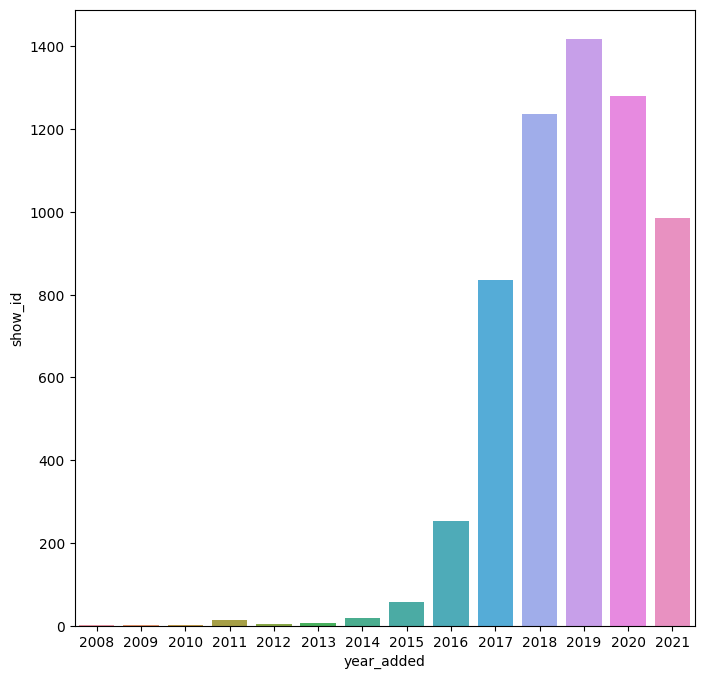

In [90]:
df_movie2 = df_movie.groupby(["year_added"]).nunique()
df_movie2.reset_index(inplace=True)
df_movie2

#Graph on how many movies are being added year after year since the inception of Netflix.

fig=plt.figure(figsize=(8,8))
sns.barplot(x="year_added",y="show_id",data=df_movie2)     

plt.show()

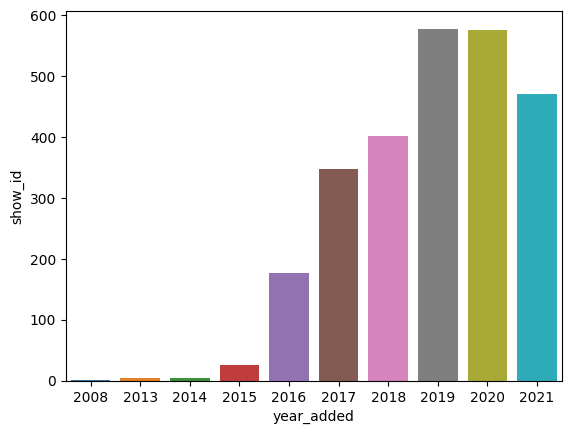

In [91]:
df_tv2 = df_tvshow.groupby(["year_added"]).nunique()
df_tv2.reset_index(inplace=True)
df_tv2

#Graph on how many TV Shows are being added year after year since the inception of Netflix.

sns.barplot(x="year_added",y="show_id",data = df_tv2)

plt.show()

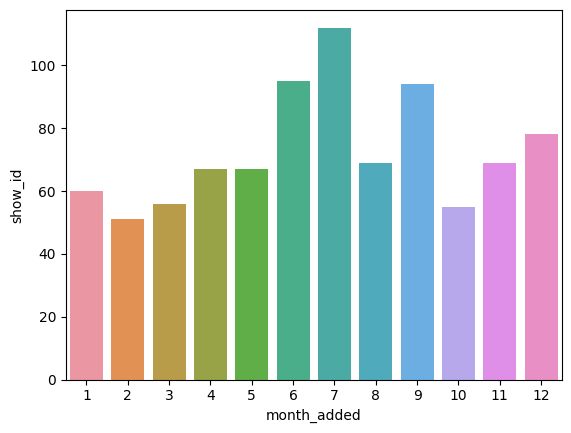

In [92]:
df_renewed = df_tvshow[df_tvshow["duration"]>=2]
df_ren_cnt = df_renewed.groupby("month_added").nunique()
df_ren_cnt.reset_index(inplace=True)
df_ren_cnt

#This graph shows in which month most number of TV Shows were added which were renewed for 2nd season and more.

sns.barplot(x="month_added",y="show_id",data=df_ren_cnt)

plt.show()

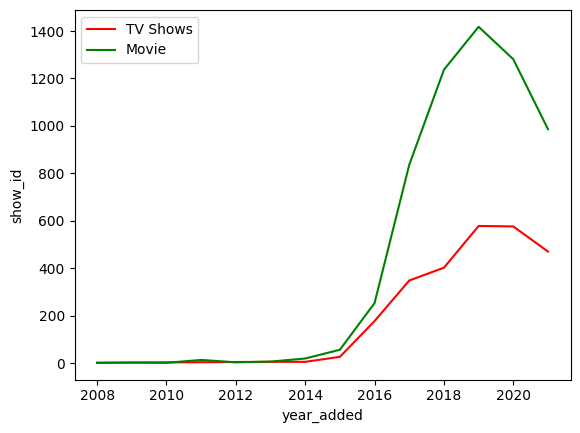

In [93]:
#The lineplot shows the comparison between number of movies and TV shows added over the years.

sns.lineplot(x="year_added",y="show_id",data = df_tv2,color="red",
            label="TV Shows")

sns.lineplot(x="year_added",y="show_id",data = df_movie2,color="green",
            label="Movie")

plt.show()

While both Movies and TV Shows have been increasing through the years but its pretty evident from the above lineplot that the movies being added have been increasing significantly over the years as compared to TV Shows being added.  

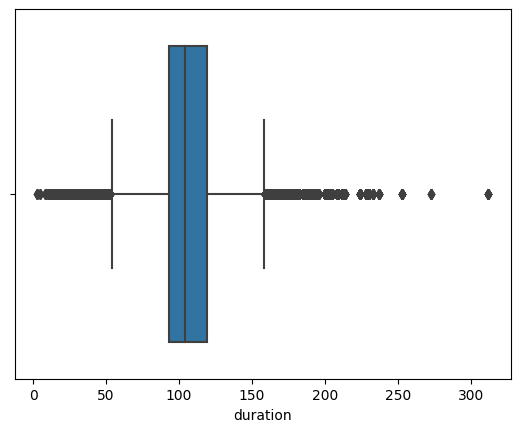

In [94]:
# This boxplot shows the mean/avg duration(in minutes) of movies and the outliers to that mean.

sns.boxplot(x=df_movie["duration"])

plt.show()

This shows the average duration of movies present in the platform. This boxplot can tell the editors and producers what is the ideal duration for a movie.

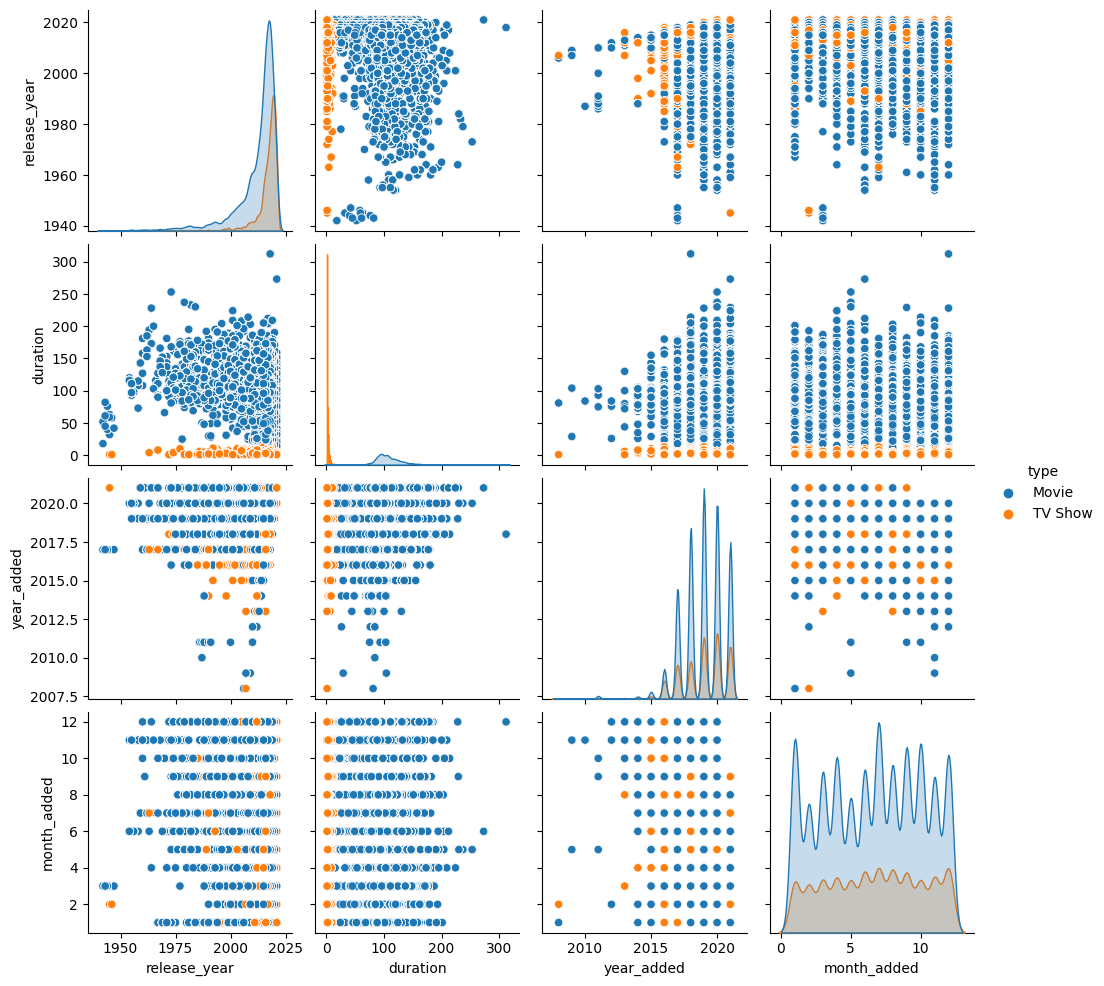

In [95]:
sns.pairplot(data=df_big,hue="type")

plt.show()



1. On studying the release year and year added it can seen that when movie or tv show is released and when it is added to the platform
2. From duration vs release year/year_added it can be seen that most TV Shows are of 1-2 season and most movies are of duration between 100-200 minutes. 



In [96]:
toptv_genre = df_renewed.groupby(["genre"])["show_id"].nunique().nlargest().index
toptv_genre

Index(['International TV Shows', 'TV Comedies', 'TV Dramas', 'Kids' TV',
       'Crime TV Shows'],
      dtype='object', name='genre')

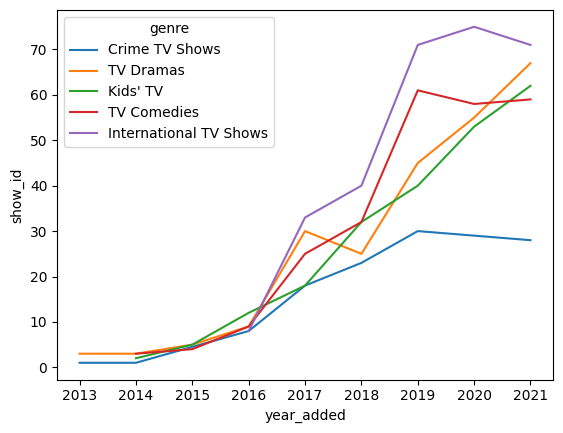

In [97]:
df_top_genre = df_renewed.loc[df_renewed["genre"].isin(toptv_genre)]
df_tg_year_wise = df_top_genre.groupby(["year_added","genre"])["show_id"].nunique().reset_index()
df_tg_year_wise

# This linechart compares top 5 genres in TV Shows on the number of shows added to the platform over the years.

sns.lineplot(data=df_tg_year_wise,x="year_added",hue="genre",y="show_id")

plt.show()

This linechart compares top 5 genres in TV Shows on the number of shows added to the platform over the years.

> There isn't very high variance in the data which is good.



In [101]:
topm_genre = df_movie.groupby(["genre"])["show_id"].nunique().nlargest().index
topm_genre

Index(['International Movies', 'Dramas', 'Comedies', 'Documentaries',
       'Action & Adventure'],
      dtype='object', name='genre')

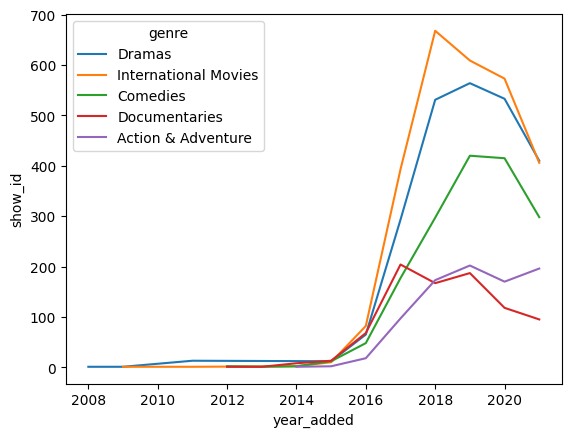

In [103]:
dfm_top_genre = df_movie.loc[df_movie["genre"].isin(topm_genre)]
dfm_tg_year_wise = dfm_top_genre.groupby(["year_added","genre"])["show_id"].nunique().reset_index()
dfm_tg_year_wise

# This linechart compares top 5 genres in Movies on the number of movies added to the platform over the years.

sns.lineplot(data=dfm_tg_year_wise,x="year_added",hue="genre",y="show_id")

plt.show()

This linechart compares top 5 genres in Movies on the number of movies added to the platform over the years.

> Here the variance in the number of movies is noticable as the International movies count reaches around 680 while the Action & Adventure movies count is around 200-210. 



In [98]:
#Finding out top 5 countries with most runtime in movies type. 

dfm_cou_runtime = df_movie.loc[:,["show_id","country","duration"]]
dfm_cou_runtime.drop_duplicates(inplace=True)
max_runtime_cou = dfm_cou_runtime.groupby("country")["duration"].agg("sum").nlargest(5).index
max_runtime_cou

Index(['United States', 'India', 'United Kingdom', 'France', 'Canada'], dtype='object', name='country')

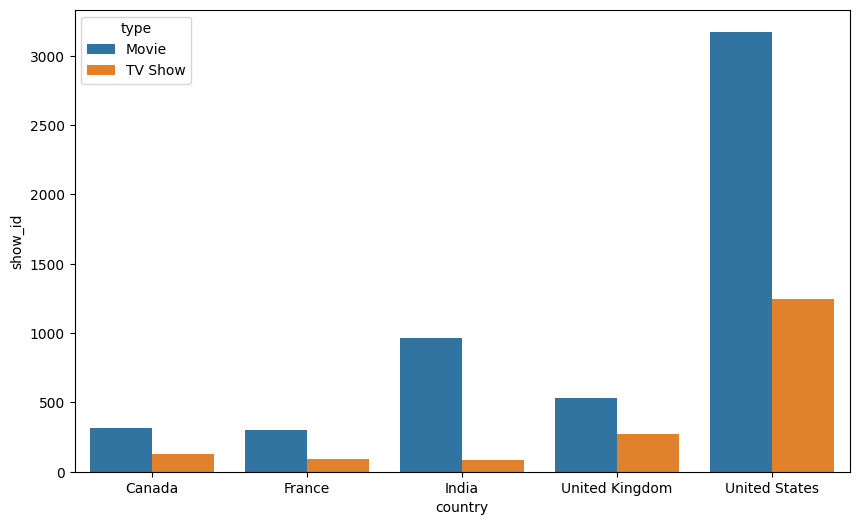

In [112]:
df_top5_cou = df_big[df_big["country"].isin(max_runtime_cou)]
df_tv_mov = df_top5_cou.groupby(["country","type"]).nunique()
df_tv_mov.reset_index(inplace=True)
df_tv_mov

fig=plt.figure(figsize=(10,6))
sns.barplot(data=df_tv_mov,x="country",y="show_id",hue="type")

plt.show()

This barplot shows the comparison between number of movies and TV Shows present from different countries.

> It can be seen that difference between movie and tv shows count from India is big. And same is the case with United States. 

